### This an example of NON linear kernel SVR

If you run into ValueError when Predicting A New Result in the colab notebook for SVR please use the following snippet to reshape : 

 

    sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

in SVR we have to apply **feature scaling** because, In SVR there is not explicit equestion of depended variable with respect to the features and there are not those coefficients multiplying each of the features and therefore not compensating with lower values for the features taking high values.

# Support Vector Regression (SVR)

## Importing the libraries

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [27]:
df = pd.read_csv('Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [28]:
x = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [29]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [30]:
y = y.reshape(len(y),1)
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

## Feature Scaling

we needed to transform y in to 2D as standard scaler requires it tobe 2D form or it will give error 

In [31]:
from sklearn.preprocessing import StandardScaler
# standardaization value scales from [-3,3]

sc_x = StandardScaler()
x = sc_x.fit_transform(x)

sc = StandardScaler()
y = sc.fit_transform(y)

print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [32]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


for showing result in graph we need to reverse feature scaling that we will do later part 

## Training the SVR model on the whole dataset

In [33]:
from sklearn.svm import SVR

regressor = SVR(kernel='rbf')  # Radial Basis kernel (popular) - is used to find non-linear calssifier or regression line
regressor.fit(x, y)            

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [37]:
# we have already fit the scaler with x, we need to transform prediction to scale

# we apply inverse transform to get result in original format

sc.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

## Visualising the SVR results

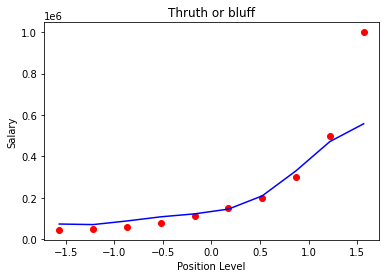

In [41]:
plt.scatter(sc_x.inverse_transform(x), sc.inverse_transform(y), color = 'red')
plt.plot(sc_x.inverse_transform(x), sc.inverse_transform(regressor.predict(sc_x.fit_transform(x)).reshape(-1,1)), color = 'blue')
plt.title('Thruth or bluff') # about previous salary
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()


## Visualising the SVR results (for higher resolution and smoother curve)

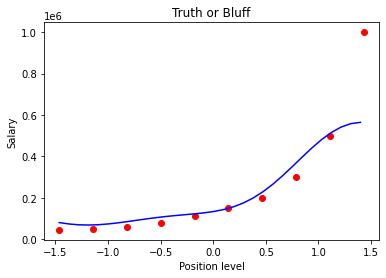

In [44]:
X_grid = np.arange(min(x), max(x), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_x.inverse_transform(x), sc.inverse_transform(y), color = 'red')
plt.plot(sc_x.inverse_transform(X_grid), sc.inverse_transform(regressor.predict(sc_x.fit_transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()